# Canny Edge Detector
$p.30 \sim p.53$

1. Gaussian filter
2. Find the intensity gradient of the image

  a. Apply a pair of convolution masks

  ![](https://i.imgur.com/EiYaObX.png)

  b. Find the gradient strength and direction with:

  ![](https://i.imgur.com/U5FEiKe.png)

3. Non-maximum Suppression
4. Thresholding edges
5. Hysteresis: The final step. Canny does use two thresholds (upper and lower):
>If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
If a pixel gradient value is below the lower threshold, then it is rejected.
If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.
Canny recommended a upper:lower ratio between 2:1 and 3:1.

[Canny Edge Detector](https://docs.opencv.org/master/da/d5c/tutorial_canny_detector.html)

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab_Notebooks/CV_HW1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


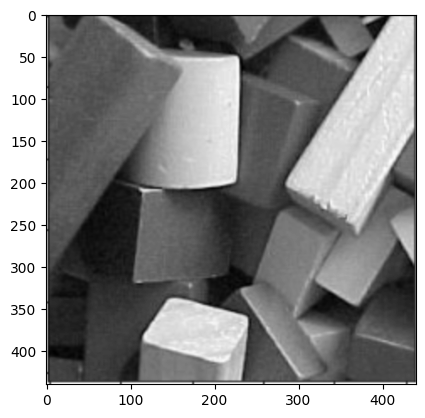

image.shape:  (440, 440)


In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

img_org = cv2.imread("blocks.jpg",0)
plt.imshow(img_org ,cmap='gray')
plt.show()
print('image.shape: ', img_org.shape)



## Step 1. Gaussian filter

original shape:(440, 440) 
result image shape: (440, 440)


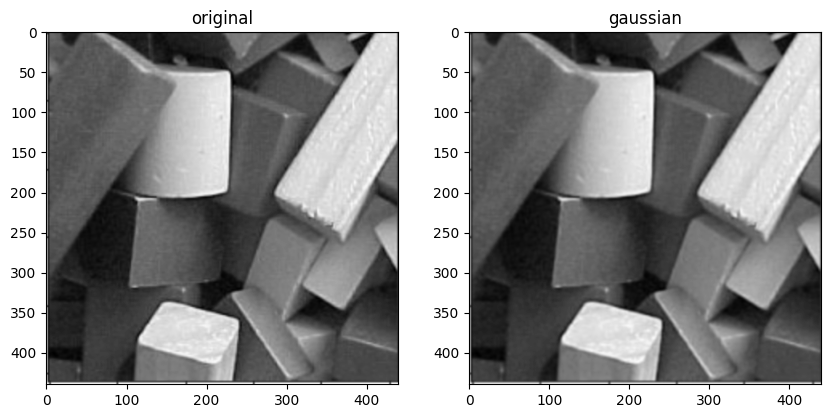

In [ ]:
def padding_img(img,k_size,style='edge'):
  # ------------ To do ------------- #
  #Grayscale
  if style == 'edge':
    return np.pad(img,((k_size,k_size),(k_size,k_size)), mode='edge').astype('uint8')
  elif style == 'reflect':
    return np.pad(img,((k_size,k_size),(k_size,k_size)), mode='reflect').astype('uint8')
  elif style == 'constant':
    return np.pad(img,((k_size,k_size),(k_size,k_size)), mode='constant').astype('uint8')

def gaussian_kernel(KernelSize):
  # ------------ To do ------------- #
  sigma = 0.3*((KernelSize-1)*0.5 - 1) + 0.8
  Gaussian=[]
  filter_center = 0.5 *(KernelSize - 1)
  #各係數相加後總值
  total=0
  for i in range(0,KernelSize):
      Filter_list = []
      for j in range(0,KernelSize):
        #高斯函數公式
        # -------------- To do ----------------- #
        x = j - filter_center
        y = i - filter_center
        gaussian_val = (1/(2*math.pi*sigma**2))* math.exp(-0.5*(x**2 + y**2)/sigma**2)
        total += gaussian_val
        Filter_list.append(gaussian_val)

      Gaussian += [Filter_list]
  #print(Gaussia)
  return np.array(Gaussian)/total

KernelSize = 3
def Gaussian_Filter(KernelSize,image):
    row,col =image.shape
    Gaussian_Kernel = gaussian_kernel(KernelSize)

    resx=np.zeros((row,col),np.uint8)
    padimg = padding_img(image,(KernelSize-1)//2,style='reflect')
    # ------------ To do ------------- #
    image = image.astype('int32')
    #filter(Kernel)* partial area
    for i in range(0,row):
      for j in range(0,col):
        par_area = padimg[i:i + KernelSize, j : j + KernelSize]
        resx[i,j] = np.sum(np.multiply(par_area, Gaussian_Kernel))
        resx = np.clip(resx, 0, 255).astype('uint8')
    return resx

G_img = Gaussian_Filter(KernelSize,img_org)

print(f'original shape:{img_org.shape} ')
print(f'result image shape: {G_img.shape}')
#create subplot
fig,axes = plt.subplots(1,2,figsize = (10, 5)) #10 inch wide, 5 inch tall

#matplotlib sets up image
axes[0].imshow(img_org,cmap='gray')
axes[0].set_title('original') #set_title NOT title
axes[1].imshow(G_img,cmap='gray')
axes[1].set_title('gaussian')

#display on screen
plt.show()

## Step 2. Filter image with derivative of Gaussian
![](https://i.imgur.com/G4e6Z4n.png)

In [ ]:
def sobel(img, filtering_type):
    h, w = img.shape

    horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    Gx = np.zeros((h - 2, w - 2))
    Gy = np.zeros((h - 2, w - 2))

    # ------------ To do ------------- #
    #convolution
    for par_ar, i, j in iterate_regions(img, 3):
      Gx[i,j] = np.sum(np.multiply( par_ar, horizontal ))
      Gy[i,j] = np.sum(np.multiply( par_ar, vertical ))
    #mag(output)
    if(filtering_type == 'horizontal'):
      output = abs(Gx)
    elif(filtering_type == 'vertical'):
      output = abs(Gy)
    elif(filtering_type == 'magnitude'):
      output = np.sqrt(Gx**2 + Gy**2)
    output = np.clip(output,0,255).astype('uint8')
    #angle
    angle = np.arctan2(Gy,Gx)

    return output, angle


def iterate_regions(img, kernel_size):
    h, w = img.shape
    for i in range(h - kernel_size + 1):
        for j in range(w - kernel_size + 1):
            img_region = img[i:(i + kernel_size), j:(j + kernel_size)]
            yield img_region, i, j



gaussian shape:(440, 440)
Horizontal Sobel filter shape:(440, 440)
Vertical Sobel filter shape: (440, 440)
Gradient amplitude shape: (440, 440)


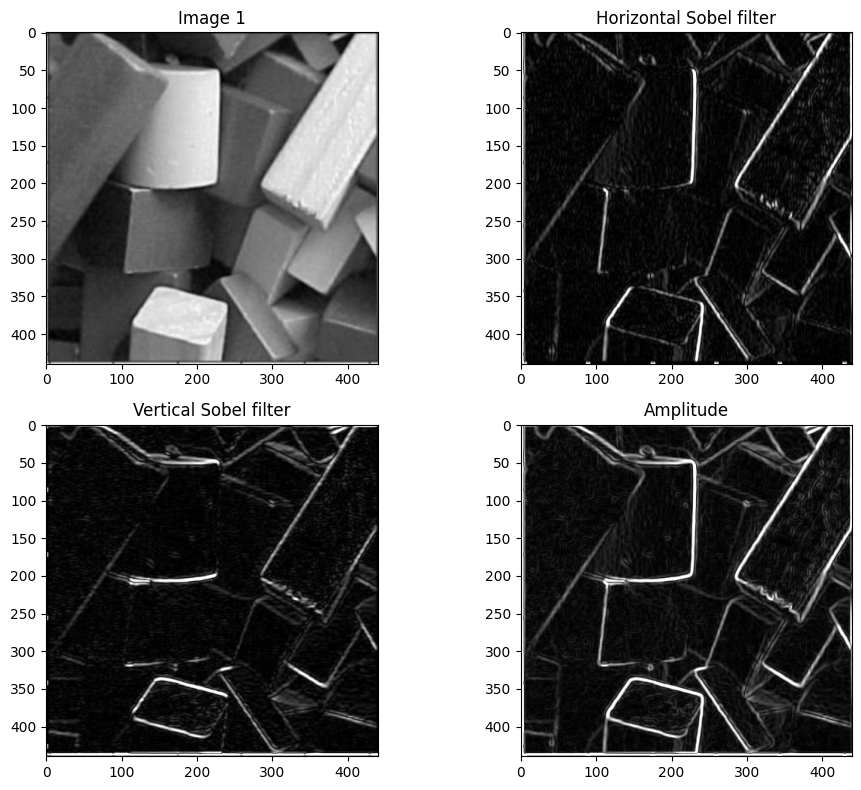

In [ ]:
# ------------ To do ------------- #
#pad original gaussian image
PG_img = padding_img(G_img, 1)

#create plot
Gx, angX = sobel(PG_img, 'horizontal')
Gy, angY = sobel(PG_img, 'vertical')
Amp, angA = sobel(PG_img, 'magnitude')
print( f'gaussian shape:{G_img.shape}')
print( f'Horizontal Sobel filter shape:{Gx.shape}')
print( f'Vertical Sobel filter shape: {Gy.shape}')
print( f'Gradient amplitude shape: {Amp.shape}')

# Create a 2x2 subplot grid and display images using imshow
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot images on each axis using imshow
axes[0, 0].imshow(G_img, cmap='gray')
axes[0, 0].set_title('Image 1')

axes[0, 1].imshow(Gx, cmap='gray')
axes[0, 1].set_title('Horizontal Sobel filter')

axes[1, 0].imshow(Gy, cmap='gray')
axes[1, 0].set_title('Vertical Sobel filter')

axes[1, 1].imshow(Amp, cmap='gray')
axes[1, 1].set_title('Amplitude')

# Add space between subplots
plt.tight_layout()

plt.show()

## Step 3. Non-maximum Suppression
Non maximum suppression without interpolation requires us to divide the 3x3 grid of pixels into 8 sections. Ie. if the gradient direction falls in between the angle -22.5 and 22.5, then we use the pixels that fall between this angle (r and q) as the value to compare with pixel p, see image below.

![](https://i.imgur.com/55DLrWn.png)

In [ ]:
def non_maximum_suppression(gradient,angle):
    gradient_copy = gradient.copy()
    height,width= gradient.shape
    angle = angle * 180 / np.pi
    for i in range(1, height-1):
        for j in range(1, width-1):
          # ------------ To do ------------- #
          if( -22.5 <= angle[i,j] < 22.5 or -180 <= angle[i,j] < -157.5 or 157.5 <= angle[i,j] < 180 ):
            q = gradient[i,j+1]
            r = gradient[i,j-1]
          elif( -67.5 <= angle[i,j] < -22.5 or 112.5 <= angle[i,j] < 157.5):
            q = gradient[i-1,j+1]
            r = gradient[i+1,j-1]
          elif( -112.5 <= angle[i,j] < -67.5 or 67.5 <= angle[i,j] < 112.5):
            q = gradient[i-1,j]
            r = gradient[i+1,j]
          elif( -157.5 <= angle[i,j] < -112.5 or 22.5 <= angle[i,j] < 67.5):
            q = gradient[i-1,j-1]
            r = gradient[i+1,j+1]
          if( gradient[i,j] < q or gradient[i,j] < r):
            gradient_copy[i,j] = 0

    return gradient_copy

gradient,angle = sobel(PG_img, 'magnitude') #padded with 1 then sobel, shape remain
After_non_maximum_supression = non_maximum_suppression(gradient,angle)


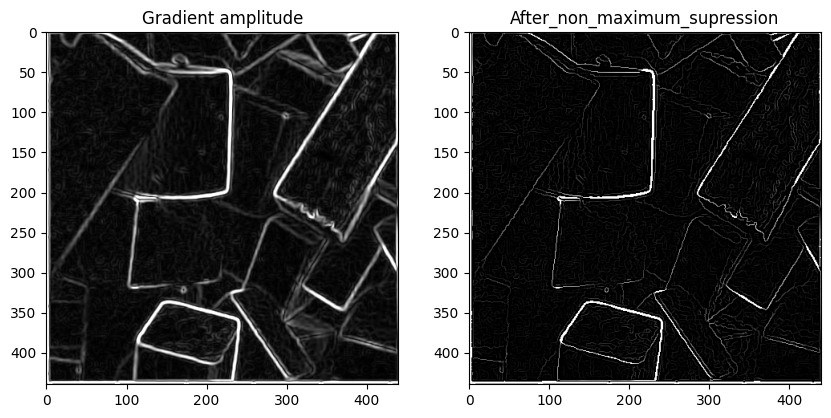

In [ ]:
# ------------ To do ------------- #
#create subplot
fig,axes = plt.subplots(1,2,figsize = (10, 5)) #10 inch wide, 5 inch tall

#matplotlib sets up image
axes[0].imshow(Amp,cmap='gray')
axes[0].set_title('Gradient amplitude') #set_title NOT title
axes[1].imshow(After_non_maximum_supression,cmap='gray')
axes[1].set_title('After_non_maximum_supression')

#display on screen
plt.show()

## Step 4. Thresholding edges

In [ ]:
WEAK = 60
def seperate(img, minimum = 60, maximum = 180):
    # ------------ To do ------------- #
    #minimum: lower threshold, max: upper threshold
    #strong edge: 255, weak edge: WEAK, not edge: 0
    thresholded = img.copy()
    rows, cols = img.shape

    for i in range(0,rows):
      for j in range(0,cols):
        if (img[i,j] < minimum): thresholded[i,j] = 0
        elif( minimum <= img[i,j] < maximum): thresholded[i,j] = WEAK #use 60 so that it shows but not obvious(weak edge)
        else: thresholded[i,j] = 255
    return thresholded

thresholding = seperate(After_non_maximum_supression, minimum = 15, maximum = 90)

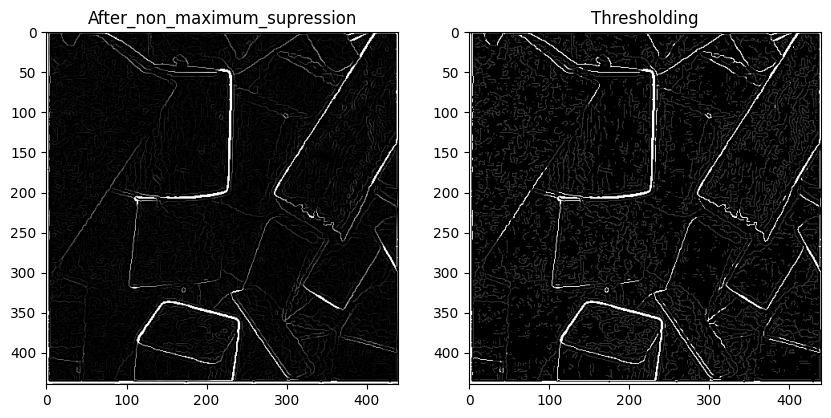

In [ ]:
# ------------ To do ------------- #
#create subplot
fig,axes = plt.subplots(1,2,figsize = (10, 5)) #10 inch wide, 5 inch tall

#matplotlib sets up image
axes[0].imshow(After_non_maximum_supression,cmap='gray')
axes[0].set_title('After_non_maximum_supression') #set_title NOT title
axes[1].imshow(thresholding,cmap='gray')
axes[1].set_title('Thresholding')

#display on screen
plt.show()

## Step 5. Hysteresis

In [ ]:
def Connect(img,weak=60):
  # ------------ To do ------------- #
  #check weak edges(60): connected to 255 = strong edge, if not goes to 0
  output = img.copy()

  rows,cols = output.shape
  for i in range(0,rows):
    for j in range(0,cols):
      try:
        if img[i,j] == weak:
        #check connected to strong edge?
          output[i,j] = 255 if img[i-1,j-1] == 255 or img[i-1,j] == 255 or img[i-1,j+1] == 255 or img[i,j-1] == 255 or img[i,j+1] == 255 or img[i+1,j-1] == 255 or img[i+1,j] == 255 or img[i+1,j+1] == 255 else 0
      except IndexError: #it happens on the margin pixels of output, but we don't care, just wanna know if there's neighboring strong edge
        pass
  return output

dst_img = Connect(thresholding,WEAK) #weak is defined above in the cell for thresholding


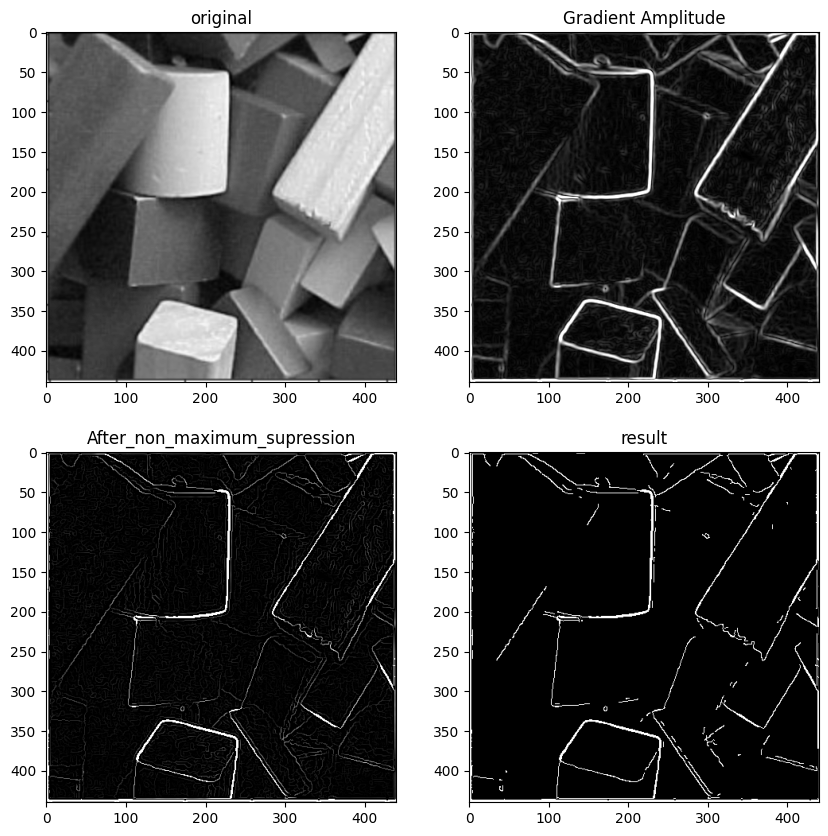

In [ ]:
# ------------ To do ------------- #
#create subplot
fig,axes = plt.subplots(2,2,figsize = (10, 10)) #10 inch wide, 5 inch tall

#matplotlib sets up image
axes[0,0].imshow(img_org,cmap='gray')
axes[0,0].set_title('original') #set_title NOT title
axes[0,1].imshow(Amp,cmap='gray')
axes[0,1].set_title('Gradient Amplitude')
axes[1,0].imshow(After_non_maximum_supression,cmap='gray')
axes[1,0].set_title('After_non_maximum_supression')
axes[1,1].imshow(dst_img,cmap='gray')
axes[1,1].set_title('result')

#display on screen
plt.show()

## Canny Edge OpenCV 套件


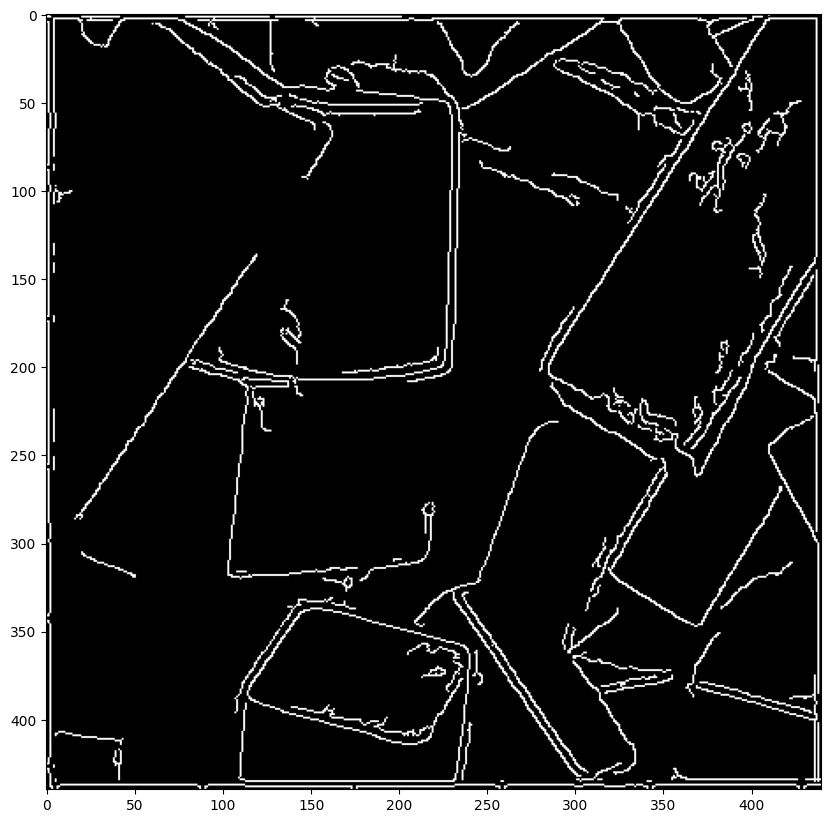

In [ ]:
low_threshold = 15
high_threshold = 90
kernel_size = 3
#這邊較低的threshold用於檢測圖像中明顯的邊緣，較高的threshold則將間斷的邊緣連接起來。
plt.figure(figsize=(10,18))
img2 = cv2.imread("blocks.jpg",0)
gray_blur = cv2.GaussianBlur(img2,(kernel_size, kernel_size),0)
edges = cv2.Canny(gray_blur, low_threshold, high_threshold)
plt.imshow(edges, cmap='Greys_r')
plt.show()

## 加分討論：為什麼和套件不一樣？


可以發現到相較於我們產生的結果，套件產生的圖有許多邊緣以外的細節，猜測這部分可能是因為在thresholding中區分強邊緣，弱邊緣的時候其使用的上界域值比較低，使得會有更多的邊緣被視作強邊緣，這也會連帶後面再連接步驟。

使用的gaussian kernel的sigma也會影響使用的gaussian filter，使得在呈現的細節量多或少產生影響。    

一開始Padding的方式也會對gradient產生影響，進而造成差別。


## 加分題目 : Dilation (膨脹) & Erosion (侵蝕)

### Dilation (膨脹)

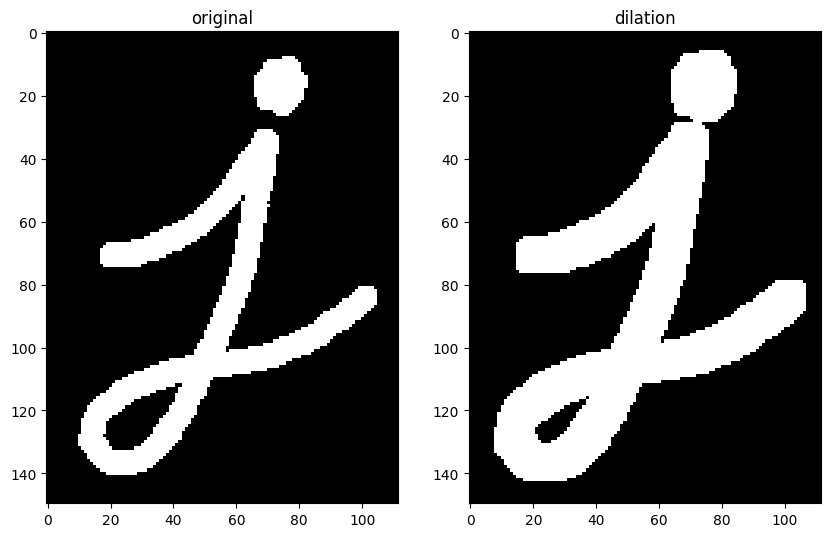

original shape:  (150, 112, 3)
dilation shape:  (150, 112)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Dilation(img, kernel):

  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


  # Perform dilation
  dilation_image = cv2.dilate(gray_image, kernel, iterations=1)

  # ------------------------------- #
  return dilation_image


# Create a kernel for dilation/erosion
kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size
image = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Midterm/original_j.png')
res = Dilation(image, kernel)

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('dilation')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', image.shape)
print('dilation shape: ', res.shape)

### Erosion (侵蝕)

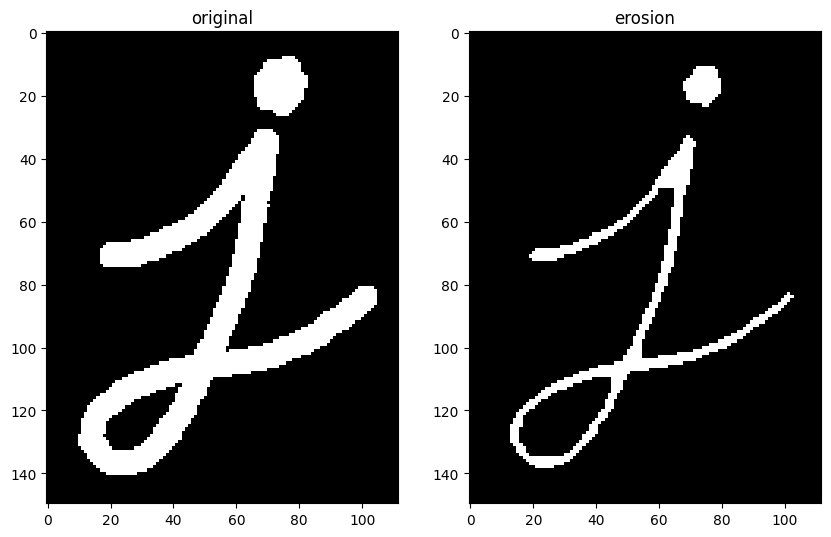

original shape:  (150, 112, 3)
erosion shape:  (150, 112)


In [ ]:
def Erosion(img, kernel):

  # -------- To do ------------- #


  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Perform erosion
  erosion_image = cv2.erode(gray_image, kernel, iterations=1)

  # ------------------------------- #
  return erosion_image

# Create a kernel for dilation/erosion
kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size
image = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Midterm/original_j.png')
res = Erosion(image,kernel)

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('erosion')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', image.shape)
print('erosion shape: ', res.shape)